In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
np.random.seed(42)

study_hours = np.random.randint(1, 10, 100)
marks = 10 + (study_hours * 8) + np.random.randint(-5, 5, 100)

data = pd.DataFrame({
    "Study_Hours": study_hours,
    "Marks": marks
})

data.head()


,Study_Hours,Marks
0,7,63
1,4,41
2,8,71
3,5,45
4,7,65


In [6]:
data

,Study_Hours,Marks
0,7,63
1,4,41
2,8,71
3,5,45
4,7,65
...,...,...
95,3,32
96,8,71
97,6,62
98,3,31


In [7]:
data.head()

,Study_Hours,Marks
0,7,63
1,4,41
2,8,71
3,5,45
4,7,65


In [8]:
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study_Hours  100 non-null    int32
 1   Marks        100 non-null    int32
dtypes: int32(2)
memory usage: 932.0 bytes


,Study_Hours,Marks
count,100.000000,100.000000
mean,5.320000,51.780000
std,2.639559,20.932108
min,1.000000,13.000000
25%,3.000000,34.750000
50%,5.000000,53.000000
75%,8.000000,71.000000
max,9.000000,82.000000


In [11]:
data.corr()

,Study_Hours,Marks
Study_Hours,1.000000,0.990519
Marks,0.990519,1.000000


In [12]:
data.isnull().sum()

Study_Hours    0
Marks          0
dtype: int64

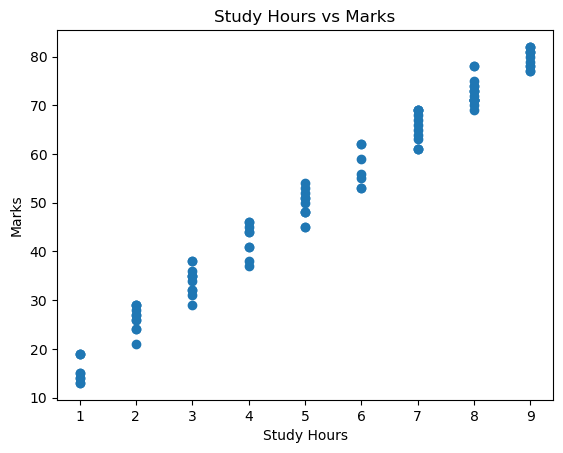

In [13]:
plt.scatter(data["Study_Hours"], data["Marks"])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks")
plt.show()


In [14]:
import seaborn as sns 

In [17]:
sns.pairplot(data)

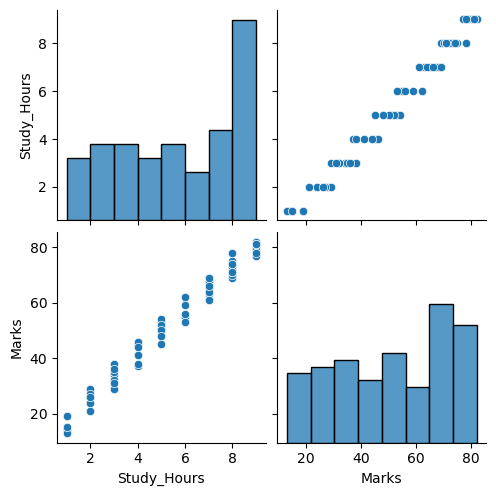

In [21]:
sns.pairplot(data)
plt.show()

In [22]:
X = data[["Study_Hours"]]   # feature (2D)
y = data["Marks"]           # target

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
model = LinearRegression()


In [25]:
LinearRegression

sklearn.linear_model._base.LinearRegression

In [26]:
LinearRegression()

LinearRegression()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
np.random.seed(42)

study_hours = np.random.randint(1, 10, 100)
marks = 15 + (study_hours * 7) + np.random.randint(-6, 6, 100)

data = pd.DataFrame({
    "Study_Hours": study_hours,
    "Marks": marks
})

data.head()


,Study_Hours,Marks
0,7,60
1,4,41
2,8,67
3,5,44
4,7,62


In [30]:
data

,Study_Hours,Marks
0,7,60
1,4,41
2,8,67
3,5,44
4,7,62
...,...,...
95,3,39
96,8,70
97,6,57
98,3,33


In [31]:
data.corr()

,Study_Hours,Marks
Study_Hours,1.000000,0.981718
Marks,0.981718,1.000000


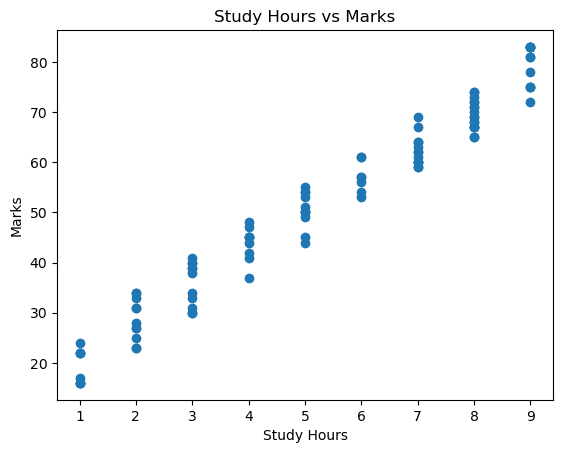

In [32]:
plt.scatter(data["Study_Hours"], data["Marks"])
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks")
plt.show()


In [33]:
import seaborn as sns


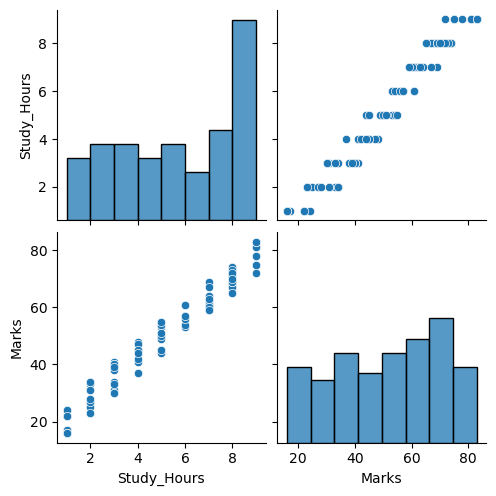

In [34]:
sns.pairplot(data)
plt.show()

In [35]:
X = data[["Study_Hours"]]   # 2D
y = data["Marks"]


In [36]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
print(X.shape)

(100, 1)


In [38]:
print(y.shape)

(100,)


In [39]:
X_test


,Study_Hours
15,2
40,5
96,8
9,4
72,9
...,...
60,7
71,7
14,5
92,7


In [40]:
print(X_test)

    Study_Hours
15            2
40            5
96            8
9             4
72            9
..          ...
60            7
71            7
14            5
92            7
51            2

[75 rows x 1 columns]


In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)

In [44]:
#TEST DATA 

X_test_scaled = scaler.transform(X_test)


In [45]:
model= LinearRegression()

model.fit(X_train_scaled,y_train)

LinearRegression()

In [46]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: 53.16
Coefficient: [19.67859472]


In [48]:
#finally model ko predit krne ke liye use kiya tesst dataset par

y_pred=model.predict(X_test_scaled)

In [51]:
#parameters dekhenge ab 

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2:", adjusted_r2)



MSE: 15.401428884659278
RMSE: 3.9244654266102637
R2: 0.9557000217446265
Adjusted R2: 0.9550931727274297


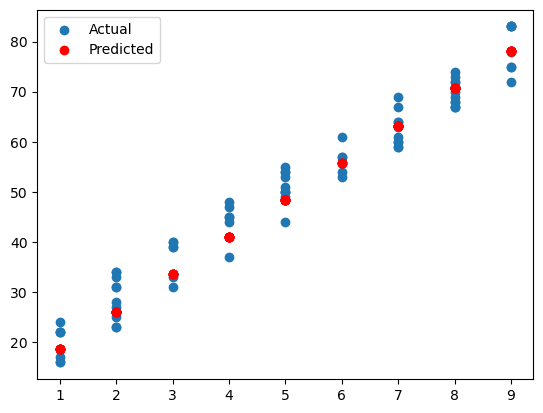

In [52]:
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, color="red", label="Predicted")
plt.legend()
plt.show()


In [58]:
new_hours = [[10]]

new_hours_scaled = scaler.transform(new_hours)
prediction = model.predict(new_hours_scaled)

print("Predicted Marks:", prediction[0])


Predicted Marks: 85.51866181156123


E:\D\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
